### EDA

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [84]:
df_clean = pd.read_csv(filepath_or_buffer= "../data/Clean_Dataset.csv") 
df_clean

,Category,Rating,Rating Count,Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Entertainment,3.9,68.0,1,0.0,Everyone,0,0,0
1,Lifestyle,0.0,0.0,1,0.0,Everyone,0,0,0
2,Shopping,4.3,918.0,1,0.0,Everyone,1,0,0
3,Finance,5.0,6.0,1,0.0,Everyone,0,0,0
4,Food & Drink,4.3,830.0,1,0.0,Everyone,1,0,0
...,...,...,...,...,...,...,...,...,...
9658,Music,0.0,0.0,1,0.0,Everyone,0,0,0
9659,Education,4.3,142.0,1,0.0,Everyone,0,0,0
9660,Music & Audio,5.0,9.0,1,0.0,Teen,1,0,0
9661,Entertainment,0.0,0.0,1,0.0,Everyone,1,0,0


In [85]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9663 entries, 0 to 9662
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9663 non-null   object 
 1   Rating            9663 non-null   float64
 2   Rating Count      9663 non-null   float64
 3   Free              9663 non-null   int64  
 4   Price             9663 non-null   float64
 5   Content Rating    9663 non-null   object 
 6   Ad Supported      9663 non-null   int64  
 7   In App Purchases  9663 non-null   int64  
 8   Editors Choice    9663 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 679.6+ KB


### Step 1: Univariate Analysis

##### State clearly as part of your univariate analysis which one is your target columns, what type of data it is, and hence what type of machine learning problem you are facing.

Our target colums is Rating and it is the average rating of an applications. The data type of this column is a float. 

##### At the start of the univariate analysis, add a paragraph discussing why we should treat numerical and categorical variables separately when doing data exploration.

We are analysing our categorical and numerical data to understand them more and also to see how are they distibuted. 

#### Categorical

In [86]:
categorical_df = df_clean.select_dtypes('object').copy()
categorical_df.head()

,Category,Content Rating
0,Entertainment,Everyone
1,Lifestyle,Everyone
2,Shopping,Everyone
3,Finance,Everyone
4,Food & Drink,Everyone


In [87]:
categorical_df['Category'].value_counts()

Category
Education                  1032
Music & Audio               724
Tools                       596
Business                    594
Entertainment               586
Books & Reference           496
Lifestyle                   494
Personalization             355
Health & Fitness            328
Shopping                    316
Productivity                315
Food & Drink                303
Travel & Local              281
Finance                     264
Arcade                      232
Puzzle                      228
Social                      211
Casual                      209
Communication               196
Sports                      195
Photography                 168
News & Magazines            144
Medical                     122
Action                      106
Educational                 106
Simulation                  101
Adventure                    88
Maps & Navigation            83
Auto & Vehicles              72
Art & Design                 70
House & Home                 64

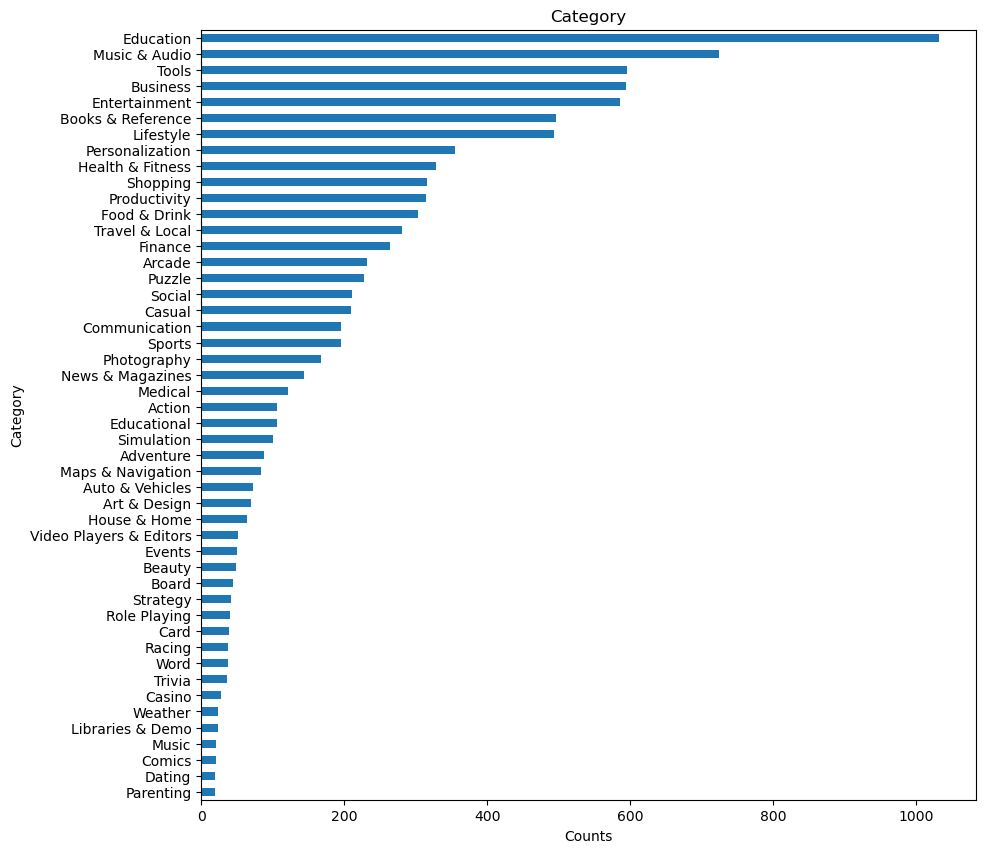

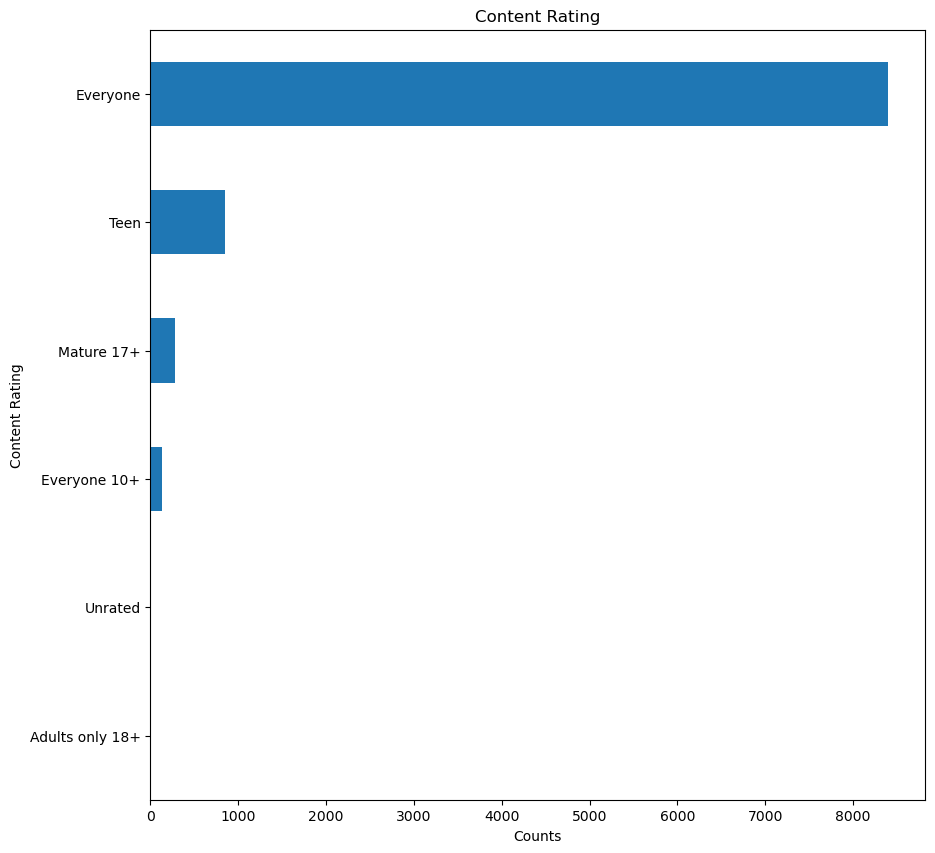

In [88]:
for column in categorical_df.columns:
    plt.figure(figsize=(10,10))
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.xlabel("Counts")
    plt.title(column)
    plt.show()

We can see that there are lots application on Education, Tools, Music & Audio and Entertainment. There are fewer application on Libraries & Demo, Parenting, Musics and Comics.
Most of the applications is for everyone and there is less application for everyone that is over 10 years old. 

#### Numerical 

In [89]:
df_clean.describe()

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice
count,9663.000000,9.663000e+03,9663.000000,9663.000000,9663.00000,9663.000000,9663.000000
mean,2.214695,1.423607e+03,0.983649,0.109652,0.50978,0.088378,0.000103
std,2.110918,2.387508e+04,0.126828,3.087679,0.49993,0.283859,0.010173
min,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000e+00,1.000000,0.000000,0.00000,0.000000,0.000000
50%,3.000000,6.000000e+00,1.000000,0.000000,1.00000,0.000000,0.000000
75%,4.300000,4.000000e+01,1.000000,0.000000,1.00000,0.000000,0.000000
max,5.000000,1.569485e+06,1.000000,269.990000,1.00000,1.000000,1.000000


In [90]:
numeric_df = df_clean.select_dtypes(['int32','float64', 'int64']).copy()
numeric_df.head()

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice
0,3.9,68.0,1,0.0,0,0,0
1,0.0,0.0,1,0.0,0,0,0
2,4.3,918.0,1,0.0,1,0,0
3,5.0,6.0,1,0.0,0,0,0
4,4.3,830.0,1,0.0,1,0,0


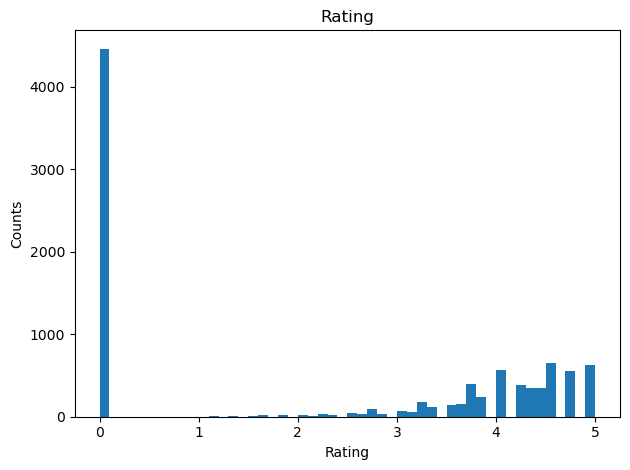

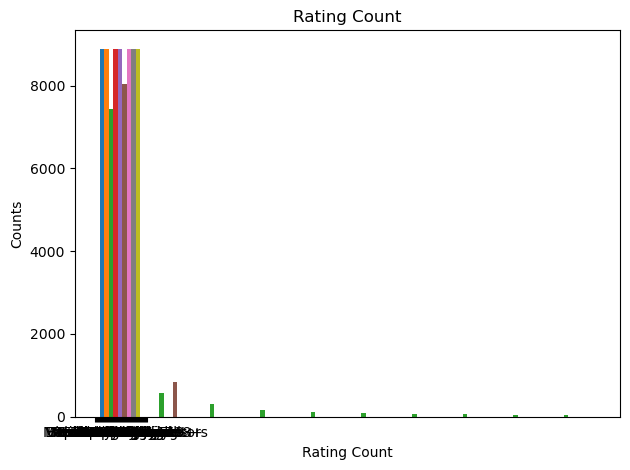

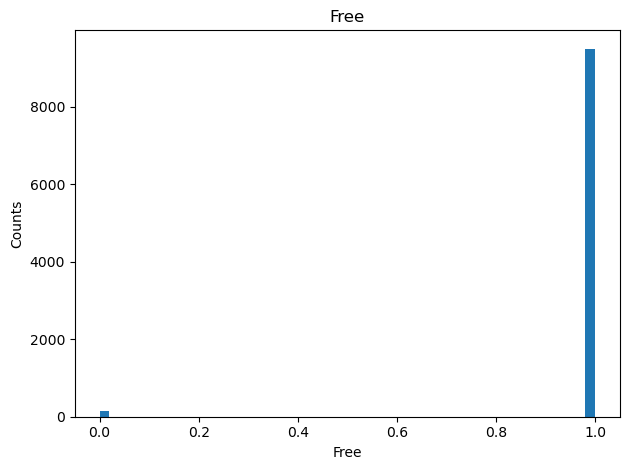

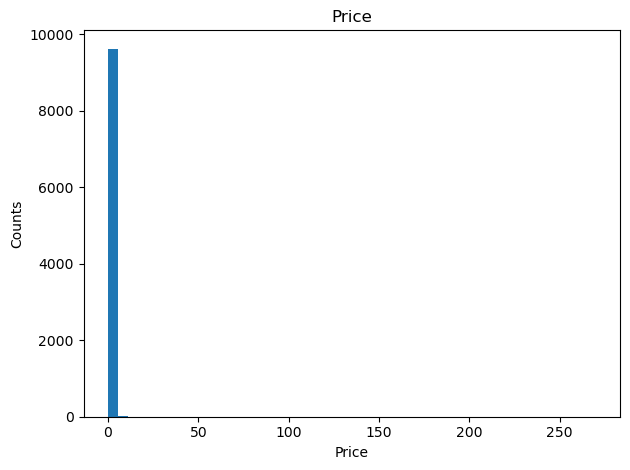

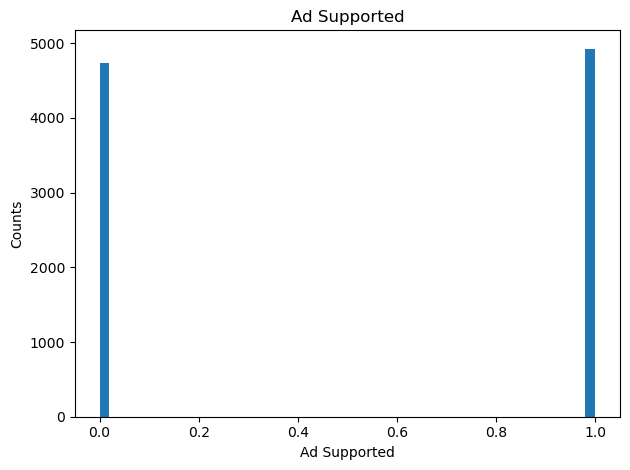

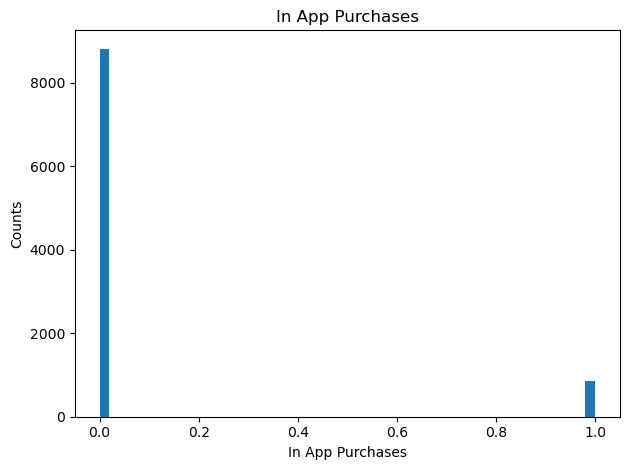

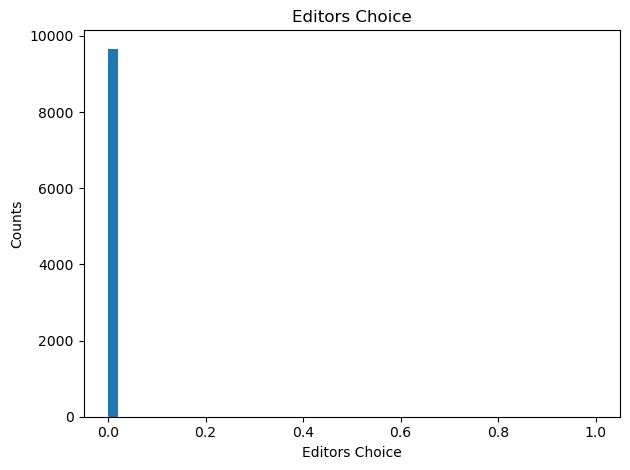

In [91]:
for column in numeric_df:
    plt.figure()
    if column == 'Rating Count':
        plt.hist(df_clean[df_clean[column] <500], bins=10)
    else:
        plt.hist(df_clean[column], bins=50)
    plt.title(column)
    plt.ylabel('Counts')
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()

We can see that most of the application are rated 0
Most of the application are free
There is half of application ad supported and half non ad supported.
Most application does not have in app purchases 
None of the applications is editor choices. 

### Step 2: Bivariate Analysis (target variable = Rating)

Our target variable is Rating, we need to analyse the relationship between this variable and our categorical and numerical values.

#### Categorical 

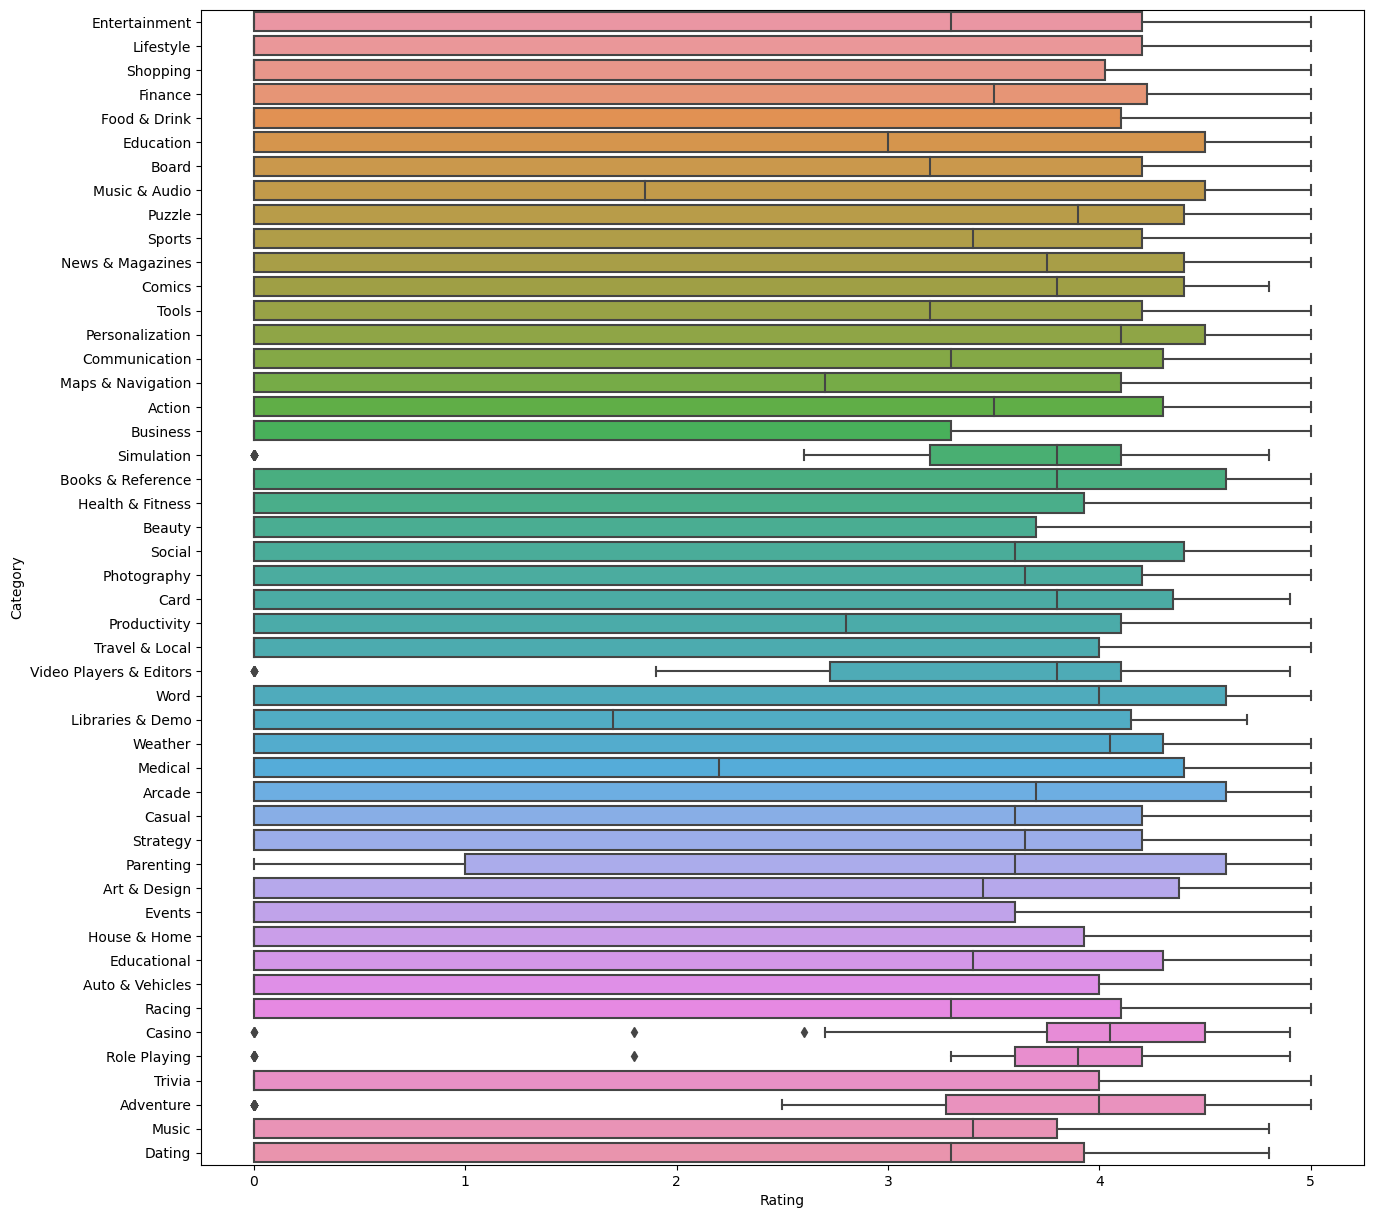

In [92]:
plt.figure(figsize = (15, 15) )
sns.boxplot(data = df_clean, x= 'Rating', y= 'Category')
plt.show()

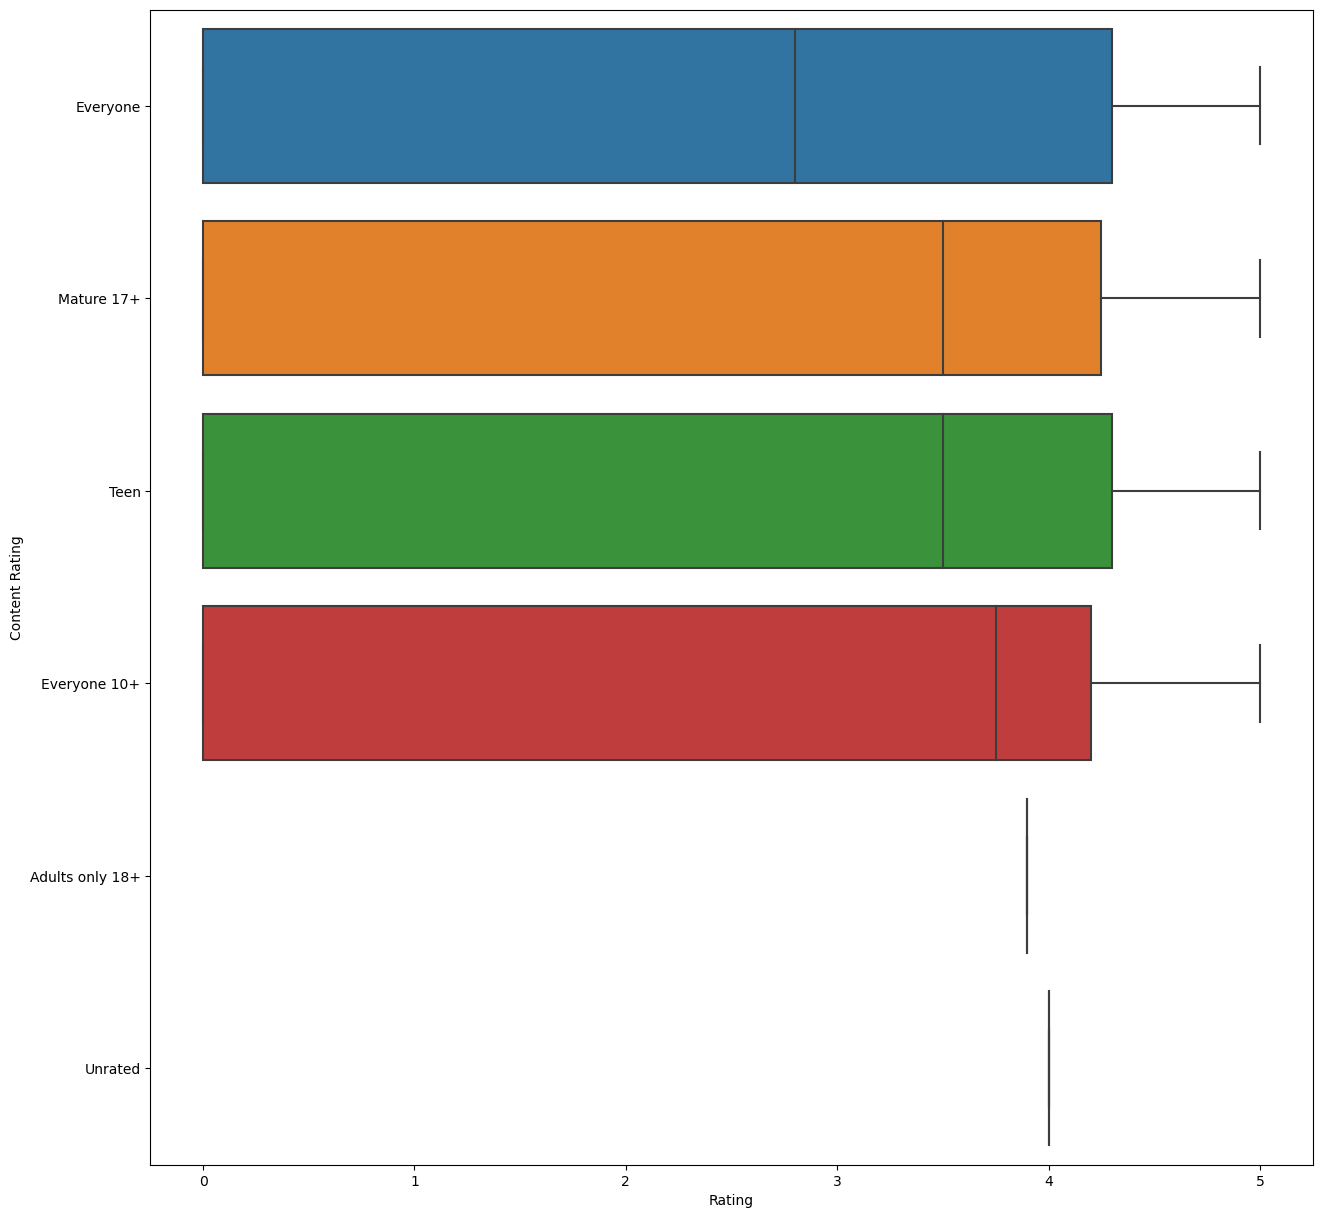

In [93]:
plt.figure(figsize = (15, 15) )
sns.boxplot(data = df_clean, x= 'Rating', y= 'Content Rating')
plt.show()

#### Numerical

c:\Users\lelon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


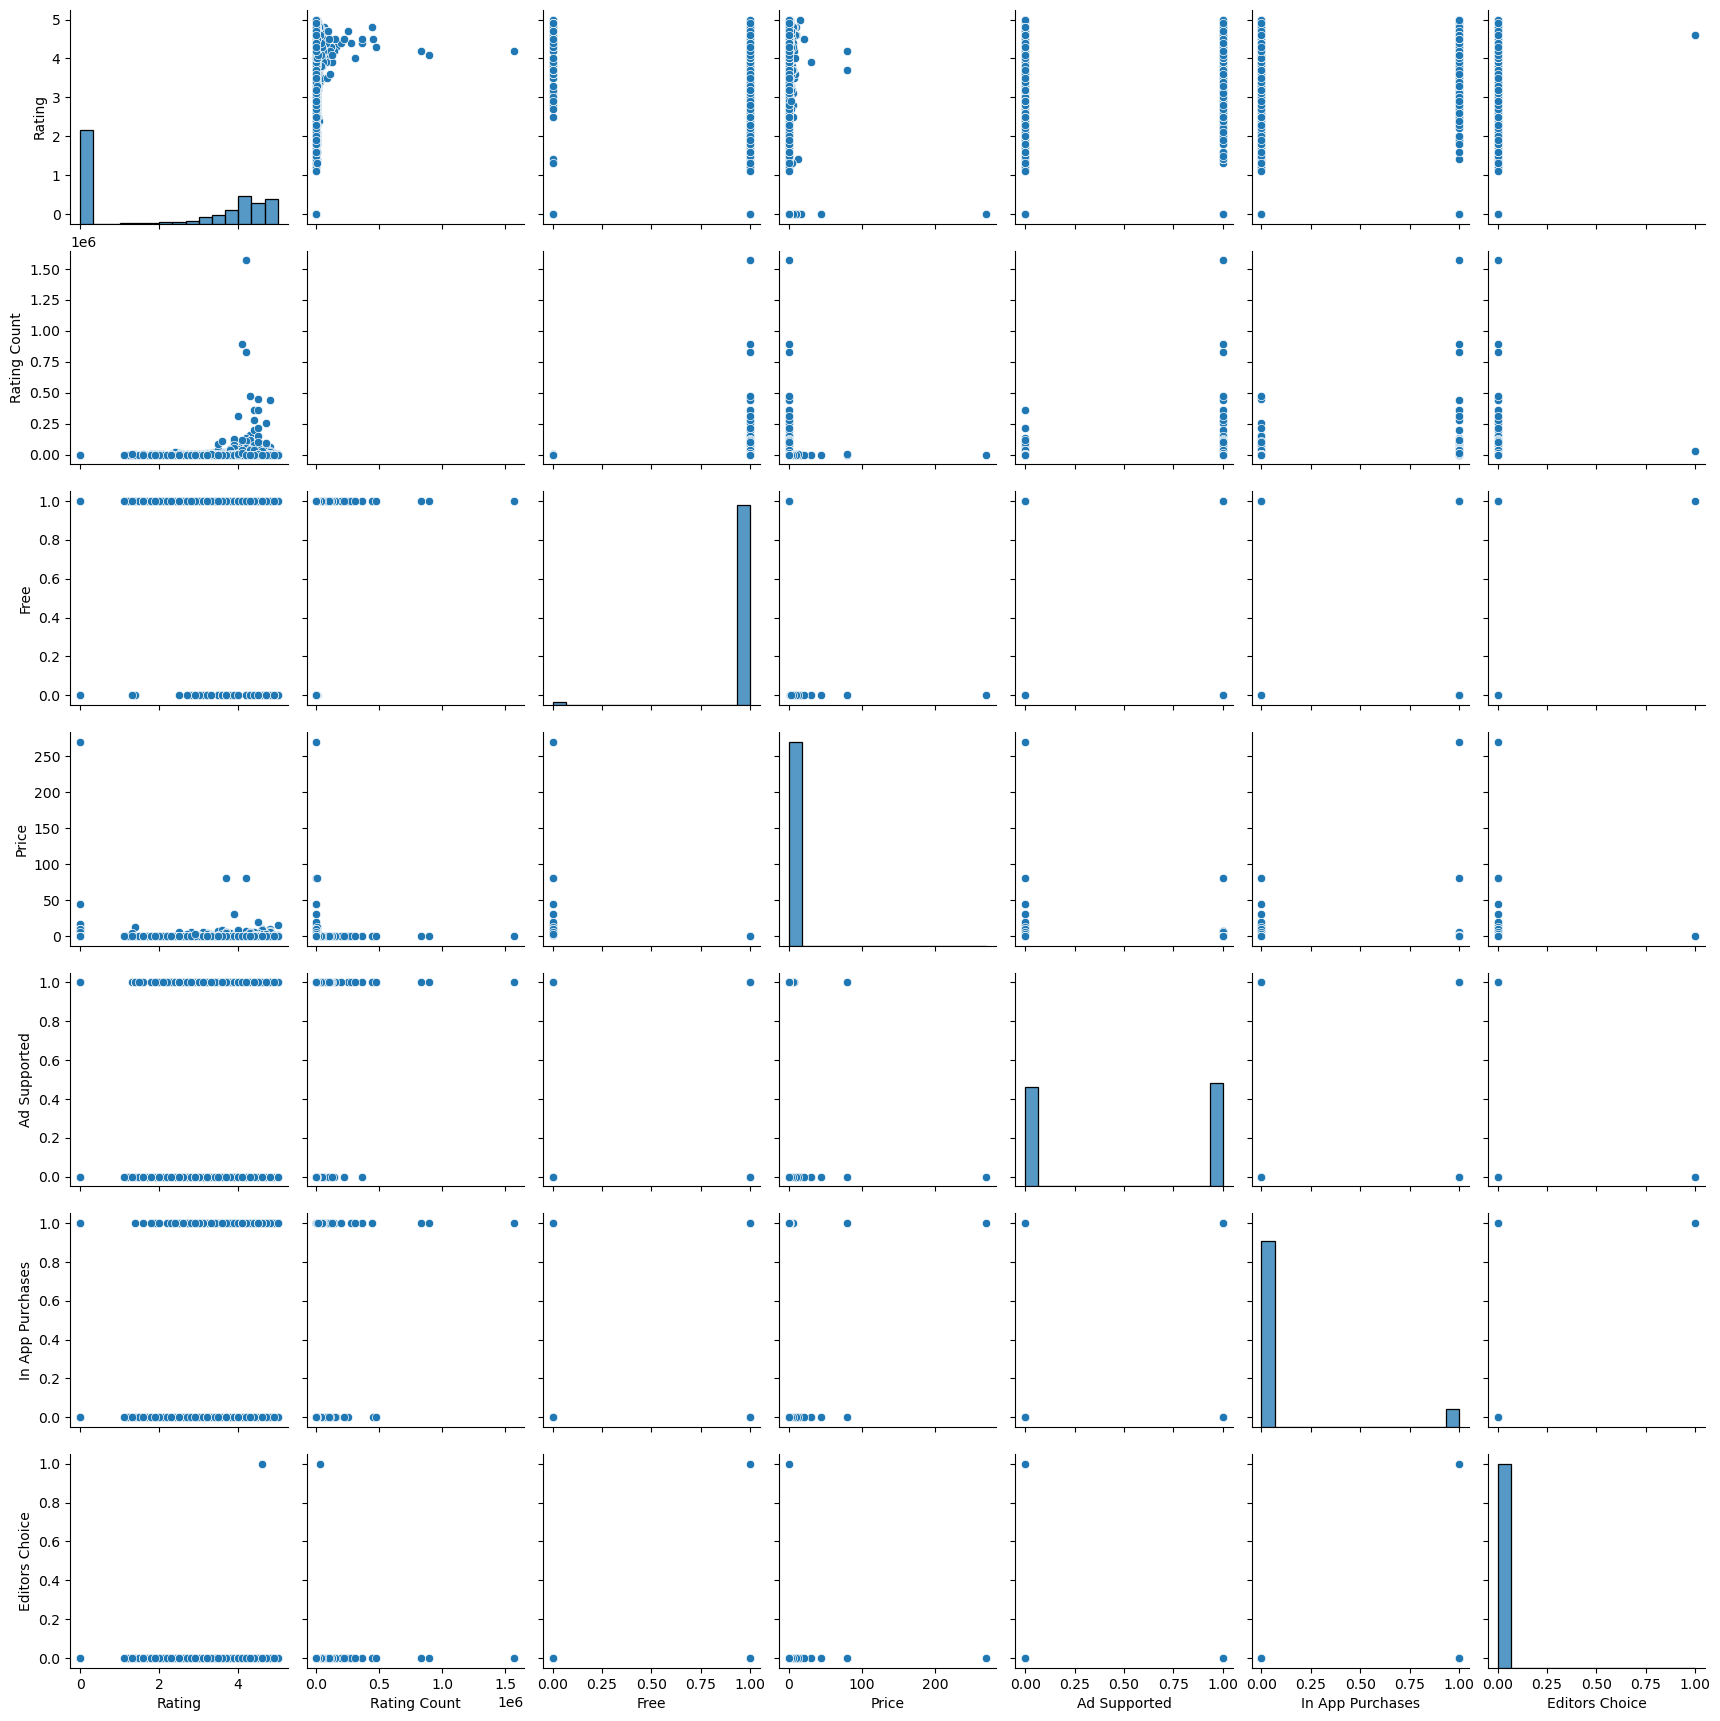

In [94]:
sns.pairplot(df_clean.select_dtypes(include=['int64','float']))

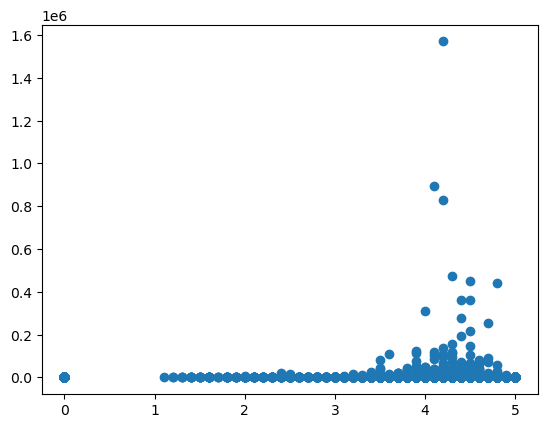

In [95]:
plt.scatter(df_clean['Rating'], df_clean['Rating Count'])

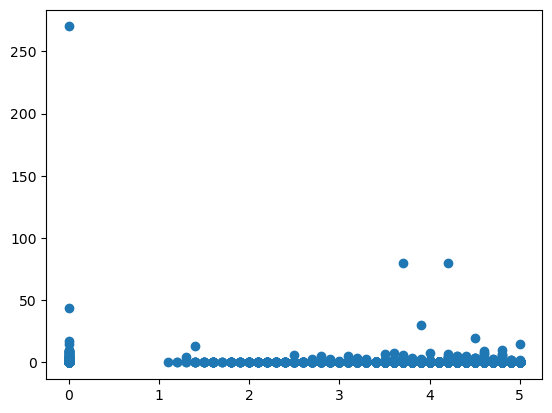

In [96]:
plt.scatter(df_clean['Rating'], df_clean['Price'])

(array([ 158.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9505.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

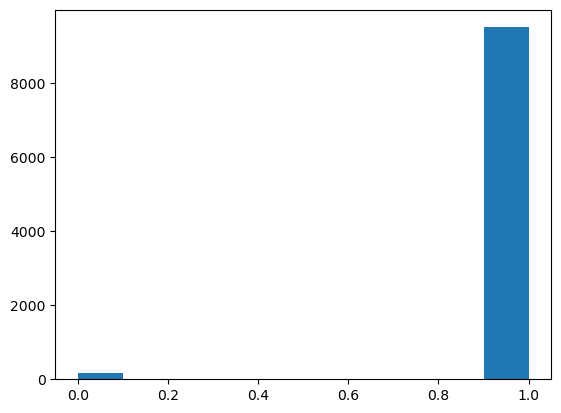

In [97]:
plt.hist(df_clean['Free'])

(array([4737.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4926.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

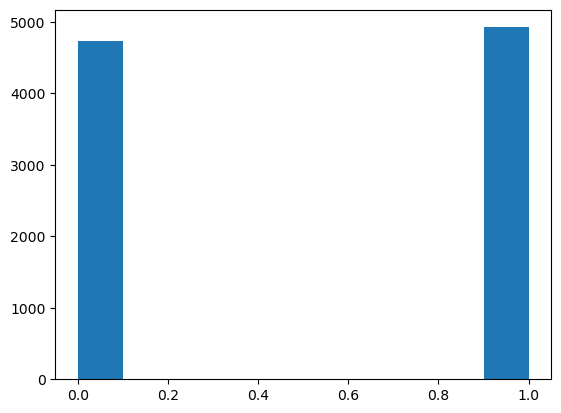

In [98]:
plt.hist(df_clean['Ad Supported'])

(array([8809.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         854.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

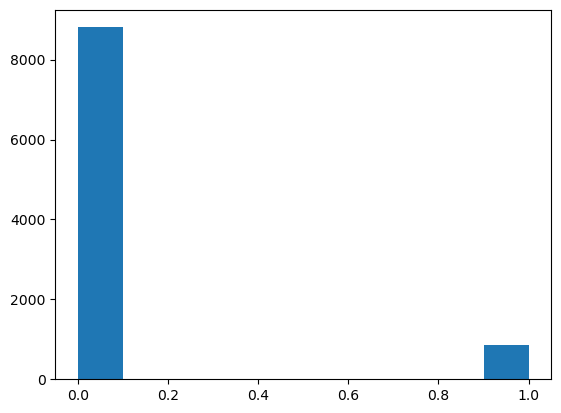

In [99]:
plt.hist(df_clean['In App Purchases'])

(array([9.662e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

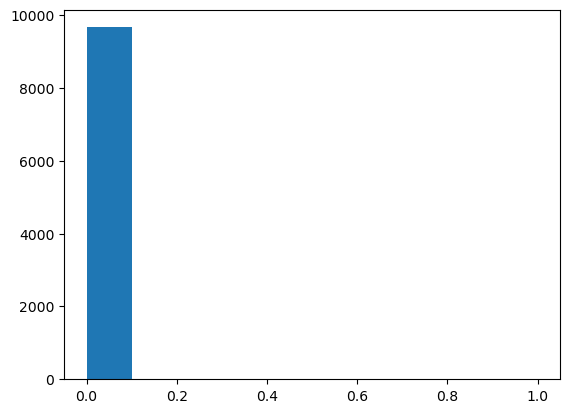

In [100]:
plt.hist(df_clean['Editors Choice'])

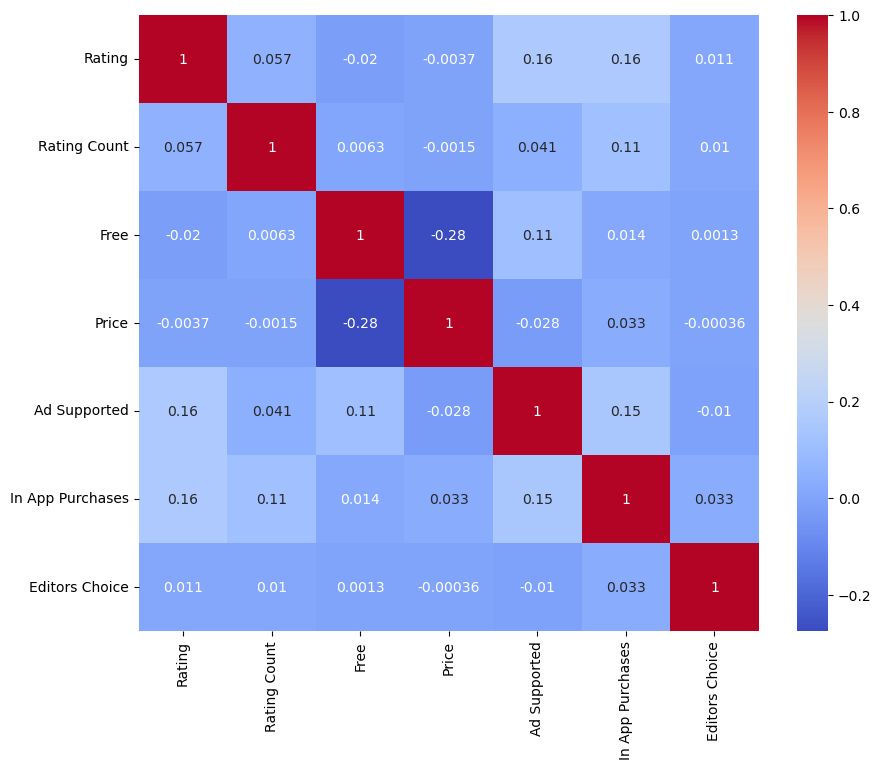

In [101]:
columns = ['Rating', 'Rating Count', 'Free', 'Price', 'Ad Supported', 'In App Purchases', 'Editors Choice']
correlation_matrix = df_clean[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.show()

We can see that our target variable Rating correlation is not really strong with the other columns.